In [ ]:
import os
print(os.listdir())  # Lists files in the current working directory


['.config', 'sample_data']


In [ ]:
file_path = "path/to/your/dataset/data_date.csv"


In [ ]:
import pandas as pd
import numpy as np

dates = pd.date_range(start="2023-01-01", periods=100, freq="D")
countries = ["India", "USA", "China", "UK", "Germany"]
data = {
    "Date": np.random.choice(dates, 100),
    "Country": np.random.choice(countries, 100),
    "AQI Value": np.random.randint(50, 200, size=100)
}
df = pd.DataFrame(data)
df.to_csv("data_date.csv", index=False)  # Save it for future use


Top 10 most polluted countries:
Country
UK         138.434783
USA        134.277778
China      133.400000
Germany    130.846154
India      118.000000
Name: AQI Value, dtype: float64


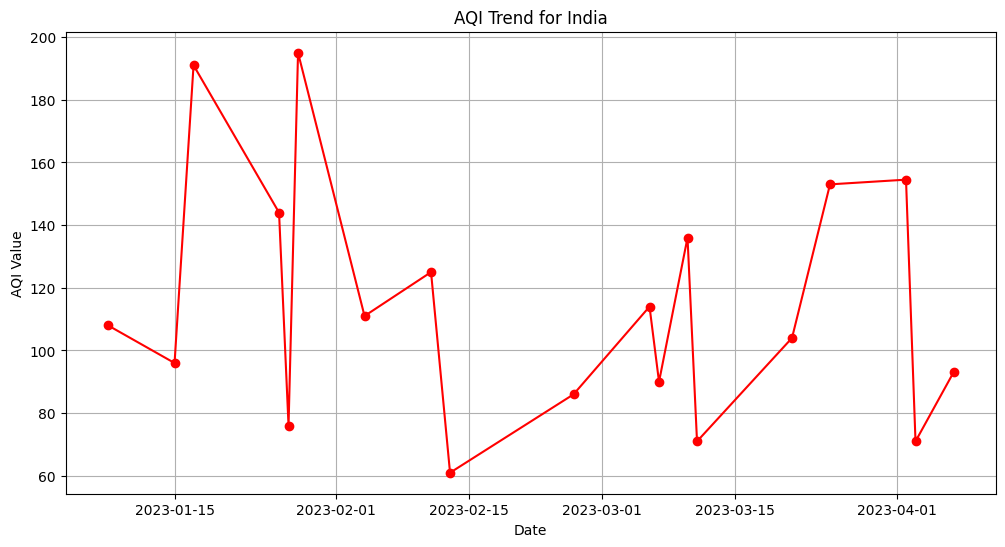

<ipython-input-8-c90b77e59253>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aqi_avg.head(10).values, y=aqi_avg.head(10).index, hue=None, palette="Reds_r")


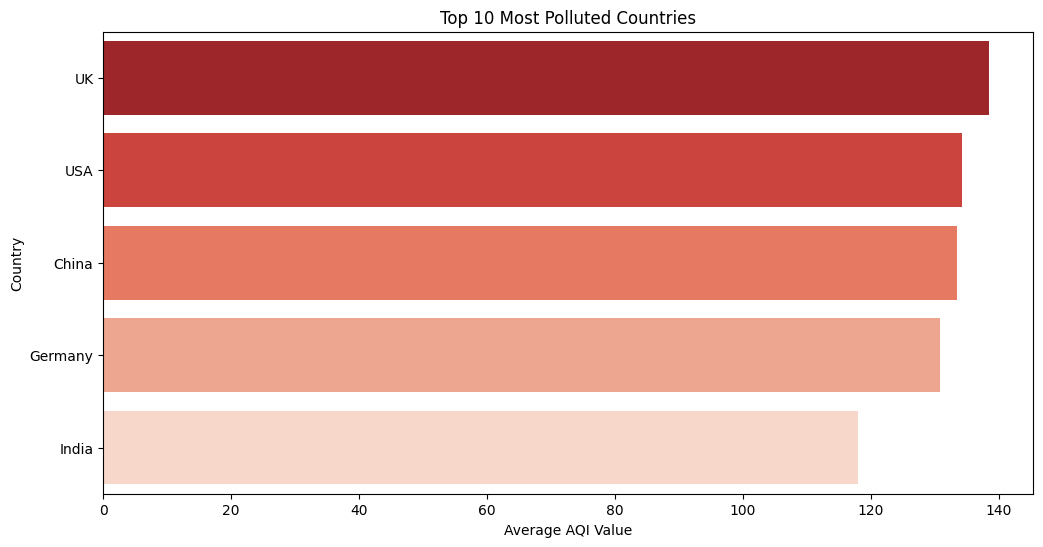

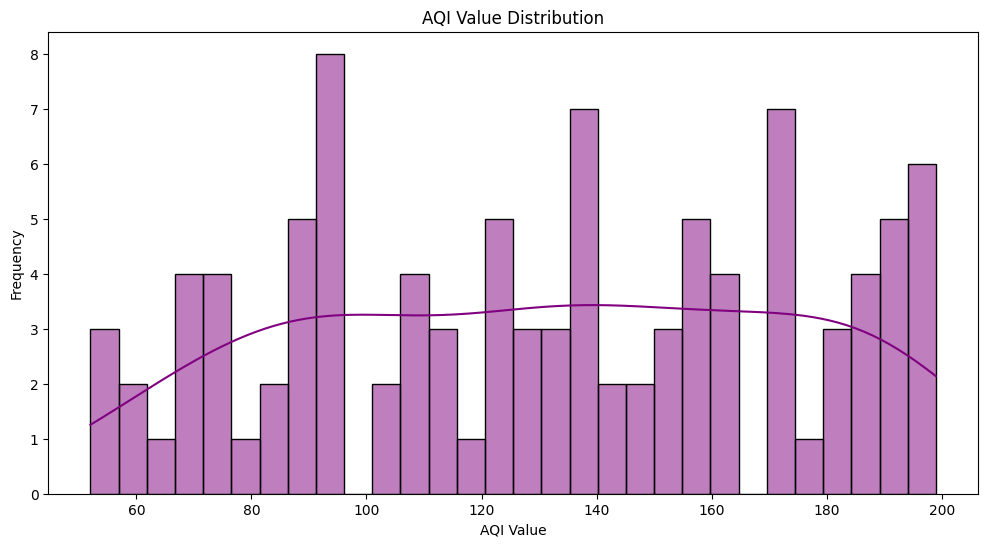

<ipython-input-8-c90b77e59253>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='AQI Value', data=df[df['Country'].isin(aqi_avg.head(10).index)], hue=None, palette="coolwarm")


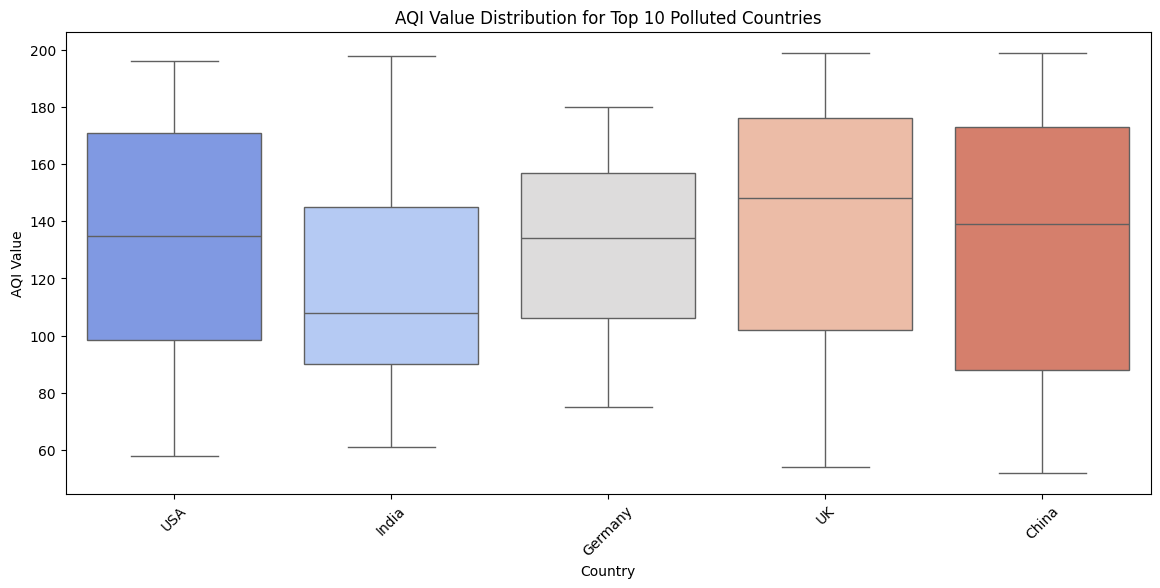

<ipython-input-8-c90b77e59253>:56: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_country_monthly = df[df['Country'] == country].resample('M', on='Date')['AQI Value'].mean()


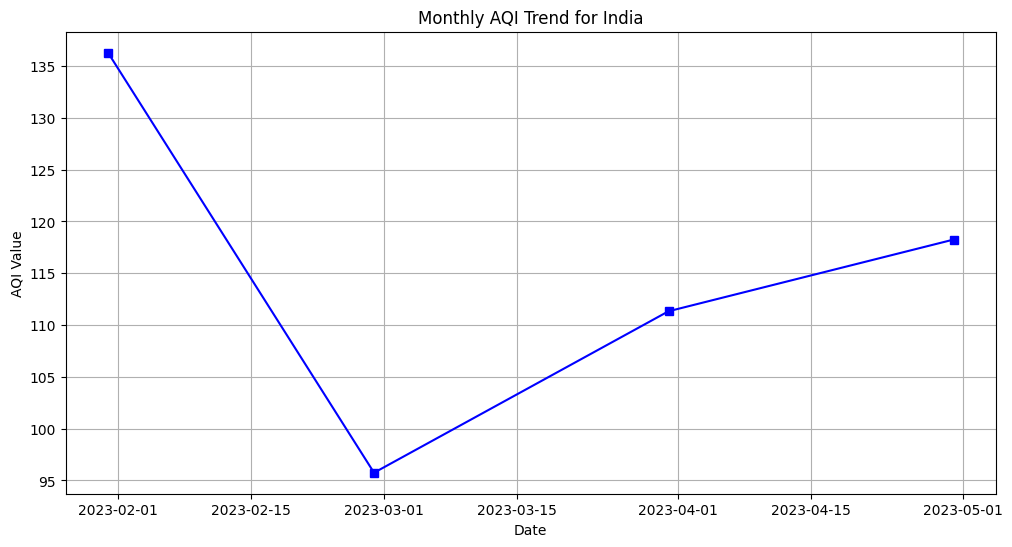

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "data_date.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate AQI values by country
aqi_avg = df.groupby("Country")['AQI Value'].mean().sort_values(ascending=False)

# Display top 10 most polluted countries
print("Top 10 most polluted countries:")
print(aqi_avg.head(10))

# Plot 1: AQI trend for a specific country (e.g., India)
country = "India"
df_country = df[df['Country'] == country].groupby("Date")['AQI Value'].mean()
plt.figure(figsize=(12, 6))
plt.plot(df_country, marker='o', linestyle='-', color='r')
plt.title(f"AQI Trend for {country}")
plt.xlabel("Date")
plt.ylabel("AQI Value")
plt.grid()
plt.show()

# Plot 2: Top 10 most polluted countries
plt.figure(figsize=(12, 6))
sns.barplot(x=aqi_avg.head(10).values, y=aqi_avg.head(10).index, hue=None, palette="Reds_r")
plt.title("Top 10 Most Polluted Countries")
plt.xlabel("Average AQI Value")
plt.ylabel("Country")
plt.show()

# Plot 3: AQI distribution across all countries
plt.figure(figsize=(12, 6))
sns.histplot(df['AQI Value'], bins=30, kde=True, color='purple')
plt.title("AQI Value Distribution")
plt.xlabel("AQI Value")
plt.ylabel("Frequency")
plt.show()

# Plot 4: Box plot of AQI values per country
plt.figure(figsize=(14, 6))
sns.boxplot(x='Country', y='AQI Value', data=df[df['Country'].isin(aqi_avg.head(10).index)], hue=None, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("AQI Value Distribution for Top 10 Polluted Countries")
plt.xlabel("Country")
plt.ylabel("AQI Value")
plt.show()

# Plot 5: Monthly AQI trend for the selected country
df_country_monthly = df[df['Country'] == country].resample('M', on='Date')['AQI Value'].mean()
plt.figure(figsize=(12, 6))
plt.plot(df_country_monthly, marker='s', linestyle='-', color='b')
plt.title(f"Monthly AQI Trend for {country}")
plt.xlabel("Date")
plt.ylabel("AQI Value")
plt.grid()
plt.show()
